In [1]:
import pandas as pd

In [2]:
# columns of interest
features = ['date',
            'location', 
            'new_tests_per_thousand',
            'new_cases_per_million',
            'total_cases_per_million',
            'tests_per_case',
            'positive_rate',                    
            'reproduction_rate',                       
            'stringency_index',
            'total_deaths_per_million',
            'new_deaths_per_million']           

In [3]:
# download the full covid data from our-world-in-data
url_data = (r'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df = pd.read_csv(url_data, 
                 usecols = features)

In [4]:
# reorder columns
df = df[features]

In [5]:
# set date as index
df.set_index('date', inplace=True)

In [6]:
# Converting the index as date
df.index = pd.to_datetime(df.index)

In [7]:
df.columns

Index(['location', 'new_tests_per_thousand', 'new_cases_per_million',
       'total_cases_per_million', 'tests_per_case', 'positive_rate',
       'reproduction_rate', 'stringency_index', 'total_deaths_per_million',
       'new_deaths_per_million'],
      dtype='object')

In [8]:
# check data type
df.dtypes

location                     object
new_tests_per_thousand      float64
new_cases_per_million       float64
total_cases_per_million     float64
tests_per_case              float64
positive_rate               float64
reproduction_rate           float64
stringency_index            float64
total_deaths_per_million    float64
new_deaths_per_million      float64
dtype: object

In [9]:
df.head(5)

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million
date,,,,,,,,,,
2020-02-24,Afghanistan,NaN,0.125,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-25,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-26,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-27,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN
2020-02-28,Afghanistan,NaN,0.000,0.125,NaN,NaN,NaN,8.33,NaN,NaN


In [10]:
df.tail(5)

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million
date,,,,,,,,,,
2022-08-30,Zimbabwe,NaN,0.250,16050.747,NaN,NaN,NaN,NaN,349.704,0.000
2022-08-31,Zimbabwe,NaN,1.125,16051.872,NaN,NaN,NaN,NaN,349.892,0.188
2022-09-01,Zimbabwe,NaN,0.750,16052.622,NaN,NaN,NaN,NaN,349.892,0.000
2022-09-02,Zimbabwe,NaN,0.375,16052.997,NaN,NaN,NaN,NaN,349.892,0.000
2022-09-03,Zimbabwe,NaN,0.688,16053.685,NaN,NaN,NaN,NaN,349.892,0.000


In [11]:
# filter by country
def filter_country(dataframe:pd.DataFrame, LOCATION:str):
  """Filter dataframe by country. """
  return dataframe[dataframe.location == LOCATION]

# filter by date
def filter_date(dataframe:pd.DataFrame, start_date:str, end_date:str)->pd.DataFrame:
  """Filter dataframe by date range including start_date and end_date. """
  return dataframe.loc[(dataframe.index >= start_date) & (dataframe.index <= end_date)]

In [12]:
## crop date
#df_germany = filter_date(df_germany, '2020-03-10', '2022-09-01')
#df_germany.head(100)

# Data Visualization

In [13]:
# check number of unique countries
df['location'].nunique()

244

In [14]:
country = 'Germany'
df_country = filter_country(df, country)

In [15]:
# add target i.e. deaths in 14 days
df_country['new_deaths_per_million' + '_future'] = df_country['new_deaths_per_million'].shift(-28)
df_country.head()

C:\Users\Sebas\AppData\Local\Temp/ipykernel_13952/1799793395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['new_deaths_per_million' + '_future'] = df_country['new_deaths_per_million'].shift(-28)


,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million,new_deaths_per_million_future
date,,,,,,,,,,,
2020-01-27,Germany,NaN,0.012,0.012,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-28,Germany,NaN,0.036,0.048,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-29,Germany,NaN,0.000,0.048,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-30,Germany,NaN,0.000,0.048,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-31,Germany,NaN,0.012,0.060,NaN,NaN,NaN,5.56,NaN,NaN,NaN


In [16]:
# plot multiple time series with moving avgs in a loop
import plotly.express as px
fig = px.line(df_country, x=df_country.index, y=["new_deaths_per_million","new_deaths_per_million_future"], title = country, template = 'plotly_dark')
fig.show()

# Temporal Smoothing

In [19]:
df_country.head()

,location,new_tests_per_thousand,new_cases_per_million,total_cases_per_million,tests_per_case,positive_rate,reproduction_rate,stringency_index,total_deaths_per_million,new_deaths_per_million,new_deaths_per_million_future
date,,,,,,,,,,,
2020-01-27,Germany,NaN,0.012,0.012,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-28,Germany,NaN,0.036,0.048,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-29,Germany,NaN,0.000,0.048,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-30,Germany,NaN,0.000,0.048,NaN,NaN,NaN,5.56,NaN,NaN,NaN
2020-01-31,Germany,NaN,0.012,0.060,NaN,NaN,NaN,5.56,NaN,NaN,NaN


In [28]:
for feat in df_country.columns[1:]:
    print(feat)
    # let´s smooth all datausing rolling window of 30 days
    df_country[feat] = df_country[feat].rolling(30, center=False).median()


new_tests_per_thousand
new_cases_per_million
total_cases_per_million
tests_per_case
positive_rate
reproduction_rate
stringency_index
total_deaths_per_million
new_deaths_per_million
new_deaths_per_million_future
month
dayofweek


<AxesSubplot:xlabel='date'>

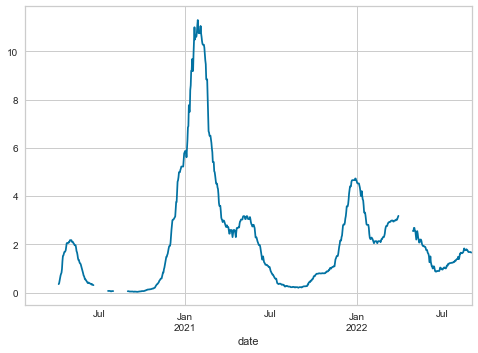

In [29]:
df_country['new_deaths_per_million'].plot()

In [30]:
# add month info
df_country['month'] = df_country.index.month
df_country['dayofweek'] = df_country.index.dayofweek

In [24]:

from pycaret.regression import *

In [50]:
# initialize setup from pycaret.regression
s = setup(  df_country, 
            target = 'new_deaths_per_million_future',
            train_size = 0.75,
            data_split_shuffle = False, 
            fold_strategy = 'timeseries', fold = 2,
            ignore_features = ['location'],
            imputation_type = 'iterative',
            numeric_imputation = 'median',
            silent = True, 
            verbose = True, 
            session_id = 123)

,Description,Value
0,session_id,123
1,Target,new_deaths_per_million_future
2,Original Data,"(951, 13)"
3,Missing Values,True
4,Numeric Features,6
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(610, 25)"


In [51]:
# compare all models and select best one based on MAE
best_model = compare_models(sort = 'R2', verbose=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,1.6013,5.6009,2.1282,0.2441,0.4889,1.2216,2.4750
xgboost,Extreme Gradient Boosting,1.5180,4.4291,2.0356,0.1865,0.4284,0.8856,0.1400
gbr,Gradient Boosting Regressor,1.7411,5.2310,2.1430,0.1803,0.4565,0.9866,0.0800
et,Extra Trees Regressor,1.6376,7.5662,2.3529,0.1029,0.4693,0.6181,0.1900
rf,Random Forest Regressor,1.8766,5.9915,2.3641,-0.0911,0.5141,1.2181,0.2300
knn,K Neighbors Regressor,2.0915,7.1256,2.5813,-0.3067,0.6687,1.0715,0.0350
lightgbm,Light Gradient Boosting Machine,1.8901,6.9687,2.6134,-0.5225,0.5052,1.0815,0.0950
dummy,Dummy Regressor,2.5444,12.1680,3.2269,-0.8107,0.8563,2.2931,0.0150
llar,Lasso Least Angle Regression,2.5444,12.1680,3.2269,-0.8107,0.8563,2.2931,0.0250
dt,Decision Tree Regressor,2.2278,8.3469,2.8811,-1.0043,0.6090,1.6461,0.0250


In [56]:
tune_model(best_model, fold=2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.3145,7.8192,2.7963,0.2195,0.5108,0.8767
1,0.7733,0.8336,0.9130,0.6421,0.3735,1.3653
Mean,1.5439,4.3264,1.8547,0.4308,0.4421,1.1210
Std,0.7706,3.4928,0.9416,0.2113,0.0686,0.2443


In [57]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

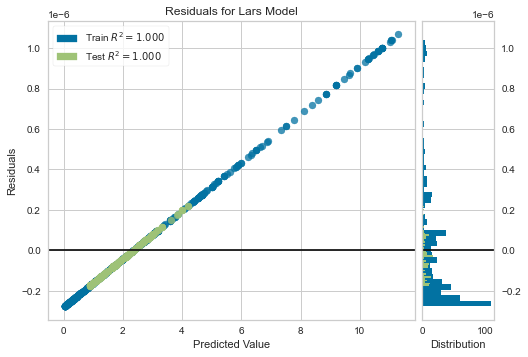

In [55]:
plot_model(best_model, plot = 'residuals')